In [1]:
from scipy import stats as statistics
from matplotlib.patches import FancyArrowPatch

Read data

In [2]:
ctypes = ["macro", "micro"]
l = []
for ct in ctypes:
    df = pd.read_csv("../stats/{}.tab".format(ct),sep="\t")
    df = df.rename(columns={ct:"nature"})
    l.append(df)
stats = pd.concat(l)
stats = stats.rename(columns={"#1_usercol":"scaf", 
                              "2_usercol" :"start", 
                              "3_usercol" :"end", 
                              "4_usercol" :"ldhelmet_rate", 
                              "5_usercol" :"n_crossover",
                              "6_usercol" :"n_tss",
                              "7_usercol" :"n_island",
                              "8_usercol" :"n_prdm9",
                              "9_usercol" :"n_hotspot",
                              "10_usercol" :"hotspot_den", 
                              "11_usercol" :"island_den", 
                              "12_usercol" :"prdm9_den", 
                              "13_usercol" :"rmsk_frac",
                              "15_pct_gc"  :"gc"})
stats = stats.replace(".",np.nan)
stats["ldhelmet_rate"] = pd.to_numeric(stats.ldhelmet_rate)

stats = stats[stats.nature!="unk"]
stats["length"] = stats["end"]

for count_var in ["crossover", "tss", "island", "prdm9", "hotspot"]:
    stats["{}_rate".format(count_var)] = stats["n_{}".format(count_var)]/stats.end
    
stats["log10_length"] = np.log10(stats.end)
print(len(stats))
stats["gap_frac"] = stats["20_num_N"]/stats["length"]
stats = stats[(stats.end>15e3) & 
              (stats["20_num_N"]<1e6) & 
              (stats.gap_frac<0.05)]

197


In [3]:
g_vars = ["ldhelmet_rate","hotspot_rate","crossover_rate", 
          "tss_rate", "island_rate", "prdm9_rate",
          "gc", "rmsk_frac", "log10_length"]
sq_stats = stats.melt(id_vars=["scaf","nature"], value_vars=g_vars)

82
PearsonRResult(statistic=0.5518787991804694, pvalue=7.690597685012673e-08)
SpearmanrResult(correlation=0.4987697789578112, pvalue=1.8503834802136692e-06)


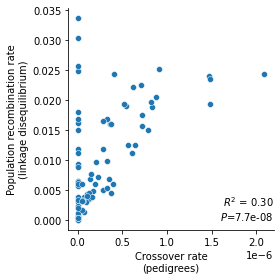

In [4]:
f,ax = plt.subplots(figsize=[4,4])

#subd = stats[stats.end>150e3].dropna() #[stats.crossover_rate>0] #
subd = stats[(stats.end>1e6)].dropna() #(stats.crossover_rate>0) 
#subd = stats.dropna()
print(len(subd))

# ax2
x = "crossover_rate"
y = "ldhelmet_rate"
subd["log_length"] = np.log10(subd.end)

sns.scatterplot(data=subd, 
                x=x, y=y, 
                ax=ax)
r,p = statistics.pearsonr(subd[x], subd[y])
print(statistics.pearsonr(subd[x], subd[y]))
print(statistics.spearmanr(subd[x], subd[y]))

ax.annotate(r"$R^2$ = {:.2f}""\n"r"$P$={:.1e}".format(r**2,p), 
            xy=(1,0.1),
            xycoords="axes fraction", va="center", ha="right")

ax.set_ylabel("Population recombination rate\n(linkage disequilibrium)")
ax.set_xlabel("Crossover rate\n(pedigrees)")
sns.despine()
plt.tight_layout()
#plt.savefig("crossover_vs_LD.pdf")

In [5]:
1.5e9/(324/24)

111111111.1111111

In [6]:
# human numbers from Halldorsson et al 2019
h_cross = 4531535
h_meiosis = 126427
h_size = 3.2e9

c_cross = 324
c_meiosis = 24
c_size = 1.5e9

# human
print("Humans have a c every {} bps".format(h_size/(h_cross/h_meiosis)))

# corn snake
print("Corn snakes have a c every {} bps".format(c_size/(c_cross/c_meiosis)))

Humans have a c every 89278004.0317464 bps
Corn snakes have a c every 111111111.1111111 bps


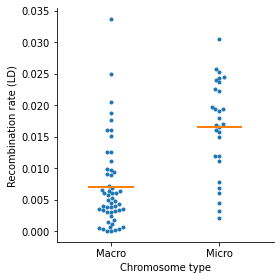

In [7]:
f,ax = plt.subplots(figsize=[4,4])
y ="ldhelmet_rate"
sns.swarmplot(data=subd, x="nature", y=y,ax=ax, s=4)
#sns.boxplot(data=subd, x="nature", y="crossover_rate",ax=ax, width=0.2, color="C0")
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'C1', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            width=0.4,
            x="nature",
            y=y,
            data=subd,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)
ax.set_xticklabels(["Macro", "Micro"])
ax.set_ylabel("Recombination rate (LD)")
ax.set_xlabel("Chromosome type")
sns.despine()
plt.tight_layout()
plt.savefig("macro_vs_micro_{}.pdf".format(y))

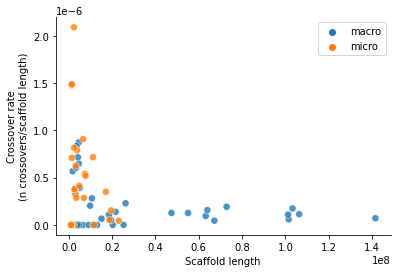

In [8]:
f,ax = plt.subplots()

x = "length"
y = "crossover_rate"

sns.scatterplot(data=subd, 
                x=x, y=y, 
                hue="nature",
                s=50,
                alpha = 0.8,
                ax=ax)

r,p = statistics.pearsonr(1/subd[x], subd[y])
#ax.annotate("Pearson's r = {:.2f}\npval={:.1e}".format(r,p), 
#            xy=(0.9,0.9),
#            xycoords="axes fraction", va="center", ha="right")
ax.set_xlabel("Scaffold length")
ax.set_ylabel("Crossover rate\n(n crossovers/scaffold length)")
ax.legend(title="")
sns.despine()

In [9]:
subd["promoter_rate"] = (subd.n_tss + subd.n_island)/subd.length

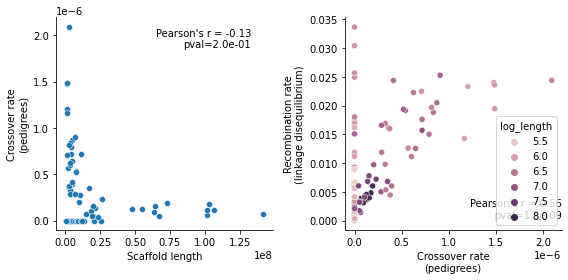

In [10]:
f,axs = plt.subplots(1,2,figsize=[8,4])

subd = stats[stats.end>150e3].dropna() #[stats.crossover_rate>0] #
#subd = stats[stats.crossover_rate>0]#.dropna()

# ax1
ax = axs[0]
x = "length"
y = "crossover_rate"
sns.scatterplot(data=subd, 
                x=x, y=y, 
                ax=ax)
r,p = statistics.pearsonr(1/subd[x], subd[y])
ax.annotate("Pearson's r = {:.2f}\npval={:.1e}".format(r,p), 
            xy=(0.9,0.9),
            xycoords="axes fraction", va="center", ha="right")
ax.set_xlabel("Scaffold length")
ax.set_ylabel("Crossover rate\n(pedigrees)")

# ax2
ax = axs[1]
x = "crossover_rate"
y = "ldhelmet_rate"
subd["log_length"] = np.log10(subd.end)

sns.scatterplot(data=subd, 
                x=x, y=y, 
                hue="log_length",
                ax=ax)
r,p = statistics.pearsonr(subd[x], subd[y])
ax.annotate("Pearson's r = {:.2f}\npval={:.1e}".format(r,p), 
            xy=(1,0.1),
            xycoords="axes fraction", va="center", ha="right")

ax.set_ylabel("Recombination rate\n(linkage disequilibrium)")
ax.set_xlabel("Crossover rate\n(pedigrees)")
sns.despine()
plt.tight_layout()
#plt.savefig("crossover_length_recombinationrates.pdf")

In [23]:
subd["crossover_rate"] = subd["crossover_rate"]/c_meiosis

[5.98582988e-09 1.95836540e-08]


/Users/marc/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/marc/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


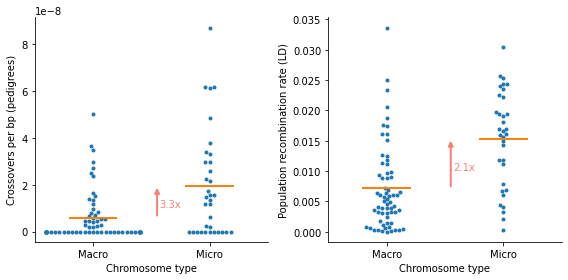

In [24]:
f,axs = plt.subplots(1,2, figsize=[8,4])


ax = axs[0]
y ="crossover_rate"
sns.swarmplot(data=subd, x="nature", y=y,ax=ax, s=4)
#sns.boxplot(data=subd, x="nature", y="crossover_rate",ax=ax, width=0.2, color="C0")
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'C1', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            width=0.4,
            x="nature",
            y=y,
            data=subd,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)
ys = subd.groupby("nature")[y].mean().values
print(ys)
xs = [0.55,0.55]
arrow = FancyArrowPatch((xs[0], ys[0]), (xs[1], ys[1]),
                        arrowstyle='-|>', mutation_scale=10,
                        color="salmon", linewidth=2)
ax.add_patch(arrow)
ax.annotate("{:.1f}x".format(ys[1]/ys[0]), 
            xy=(0.57, np.mean(ys)*0.9), 
            fontsize=10,
            ha = "left", va="center",
            color="salmon")

ax.set_xticklabels(["Macro", "Micro"])
ax.set_ylabel("Crossovers per bp (pedigrees)")
ax.set_xlabel("Chromosome type")

ax = axs[1]
y ="ldhelmet_rate"
sns.swarmplot(data=subd, x="nature", y=y,ax=ax, s=4)
#sns.boxplot(data=subd, x="nature", y="crossover_rate",ax=ax, width=0.2, color="C0")
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'C1', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            width=0.4,
            x="nature",
            y=y,
            data=subd,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

ys = subd.groupby("nature")[y].mean().values
xs = [0.55,0.55]
arrow = FancyArrowPatch((xs[0], ys[0]), (xs[1], ys[1]),
                        arrowstyle='-|>', mutation_scale=10,
                        color="salmon", linewidth=2)
ax.add_patch(arrow)
ax.annotate("{:.1f}x".format(ys[1]/ys[0]), 
            xy=(0.57, np.mean(ys)*0.95), 
            fontsize=10,
            ha = "left", va="center",
            color="salmon")

ax.set_xticklabels(["Macro", "Micro"])
ax.set_ylabel("Population recombination rate (LD)")
ax.set_xlabel("Chromosome type")

sns.despine()
plt.tight_layout()
plt.savefig("recomb_ctypes.jpeg", dpi=400)

In [12]:
ax = axs[2]
y ="island_den"
sns.swarmplot(data=subd, x="nature", y=y,ax=ax, s=4)
#sns.boxplot(data=subd, x="nature", y="crossover_rate",ax=ax, width=0.2, color="C0")
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'C1', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            width=0.4,
            x="nature",
            y=y,
            data=subd,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

ys = subd.groupby("nature")[y].mean().values
xs = [0.55,0.55]
arrow = FancyArrowPatch((xs[0], ys[0]), (xs[1], ys[1]),
                        arrowstyle='-|>', mutation_scale=10,
                        color="salmon", linewidth=2)
ax.add_patch(arrow)
ax.annotate("{:.1f}x".format(ys[1]/ys[0]), 
            xy=(0.57, np.mean(ys)*0.95), 
            fontsize=10,
            ha = "left", va="center",
            color="salmon")

ax.set_xticklabels(["Macro", "Micro"])
ax.set_ylabel("Recombination rate (LD)")
ax.set_xlabel("Chromosome type")

IndexError: index 2 is out of bounds for axis 0 with size 2